## El dataset de MNIST

### Es el hello word de las redes neuronales

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
len(mnist.train.images)

55000

In [4]:
len(mnist.test.images)

10000

In [5]:
im_temp = mnist.train.images[0]
print(len(im_temp)) # 28*28 = 784
im_temp # las imagenes viene en formato unidimencional 

784


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [6]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

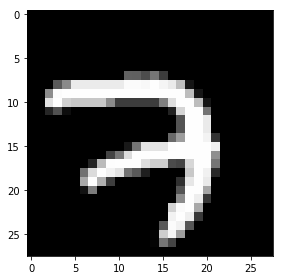

In [7]:
io.imshow(np.reshape(im_temp,(28,28)))
plt.show()

In [8]:
mnist.train.labels[0] # se trata del 7 el arreglo es 0,1,2,3,4,5,6,7 el 7 tiene 1

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### TensorFlow hace todo el trabajo duro codigo de bajo nivel y lo que hacemos en python en utilizar la api 

## Una red neuronal con Tensor Flow - v1
* Las imagenes de entrenamiento de MNIST viven en un espacio vectorial de dimension 784
* El dataset se puede pensar como 55000 filas y 784 columnas
* Cada datao del dataset es un numero en 0 y 1

y = softmax(W * x, b)

In [9]:
dimension_input = 784
numero_categorias = 10 #output

In [10]:
# Los placeholder no se modifica en las iteraciones esa es la direfencia
x = tf.placeholder(tf.float32, [None,dimension_input]) # None: Significa que la entrada puede tener cualqquier longitud

In [11]:
# las Variables pueden modificarse desde la red neuronal con las iteracion
W = tf.Variable(tf.zeros([dimension_input,numero_categorias])) 
b = tf.Variable(tf.zeros([numero_categorias]))

In [12]:
#Truco para lidiar con los tensores 2 d escribir la multiplicacion alrevez
softmax_args = tf.matmul(x,W) + b #matmul: matrix multiplicator
y_hat = tf.nn.softmax(softmax_args)

#### En Machine learning no se define lo que es un modelo bueno, si no que definimos que significa que un modelo sea malo, esto se conoce como el coste(perdida, loss) como de lejos esta nuestro modelo de la salida que deseamos, lo que se hace es minimizar el error

#### El modelo siempre va a ser malo, pero buscamos reducir las perdidas para encontrar el menos malo

### Entranano la red neuronal
* Loss/Cost <- Obejtico minimizar las perdidas

In [13]:
from IPython.display import display, Math, Latex

In [14]:
display(Math(r"H_{y'}(\hat{y}) = -\sum_{i} y_i' log(\hat{y_i})"))

<IPython.core.display.Math object>

La entropia cruzada mide como de ineficiente son nuestras predicciones con respecto de describir la realidad
Osea compara la prediccion con lo real

In [15]:
y_ = tf.placeholder(tf.float32,[None,10]) # None al modelo se le pueden sumistrar cuantos registros queramos

In [16]:
#Esta es la funcion de la entropia
#logaritmo de prediccion por el valor real (que son del mismo tamaño) y hacemos el promedio de todas las multiplicacion
cross_entropy_args = - tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices = [1]) #reduction_indices = solo la segunda dimension
#Calcula en promedio
cross_entropy = tf.reduce_mean(cross_entropy_args)

In [17]:
## PERO TENSOR FLOW YA TIENE ESA FUNCION 
#tf.nn.softmax_cross_entropy_with_logits(softmax_args,y_)

In [18]:
#GradientDescentOptimizer funcion de entrenamiento reducida con la funcion cross_entropy
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# Añadira neuvas operaciones al grafo que implementaran propagacion hacia atras y Gradiente descendiente de modo de con cada 
# operacion que ejecute ejecutara 1 paso de entrenamiento con Gradiente Descendiente con una modificacion adicional
# de las variables de los pesos y el bias que reduscan la perdida(la entropia cruzada)

In [19]:
session = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [48]:
for _ in range(100):
    #hacer que se entre de 100 en 100 registros aleatorios se le dice entrenamiento estocastico
    #gradiente descendiete estocastico
    #Si le meto las 50,000 imagenes por 5000 iteracion puede tomar semanas, pero es el mejor escenario
    batch_x, batch_y = mnist.train.next_batch(1000)
    session.run(train_step, feed_dict = { x:batch_x, y_: batch_y})


## Evaluando la red neuronal

Arc max da el indice del mayor numero de entradas del tensor junto con los ejes si le pido a tensorflor el arcmax de la columan de las y en la posicion 1
Esa sera la etiqueta del modelo que es mas probable que a sido clasificado si hacemos lo mismo con y_ sera la correcta

In [49]:
#regresa una lista de booleanos de las 10 prediccciones y las 10 verdaderas entonces la pareja sera una prediccion correcta
correct_predictions = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))

In [50]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [51]:
eficacia = session.run(accuracy, feed_dict = {x: mnist.test.images, y_:mnist.test.labels}) * 100
print (eficacia," de eficacia en las imagenes de test que no habian sido suministradasa la red")

92.69999861717224  de eficacia en las imagenes de test que no habian sido suministradasa la red


## Mucha paciencia, cada red es unica, tendre que preparar datos, tendre que seleccionar las funciones de desicion, y
# a darle

In [21]:
#session.close()